In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


100%|██████████| 21/21 [00:43<00:00,  2.07s/it]


Epoch [1/25], Loss: 21.1055, Accuracy: 47.88%


100%|██████████| 21/21 [00:11<00:00,  1.82it/s]


Epoch [2/25], Loss: 14.4765, Accuracy: 53.33%


100%|██████████| 21/21 [00:10<00:00,  1.93it/s]


Epoch [3/25], Loss: 13.9852, Accuracy: 58.79%


100%|██████████| 21/21 [00:10<00:00,  1.92it/s]


Epoch [4/25], Loss: 13.5179, Accuracy: 56.36%


100%|██████████| 21/21 [00:10<00:00,  1.93it/s]


Epoch [5/25], Loss: 11.1622, Accuracy: 76.97%


100%|██████████| 21/21 [00:10<00:00,  1.94it/s]


Epoch [6/25], Loss: 8.9173, Accuracy: 83.64%


100%|██████████| 21/21 [00:09<00:00,  2.11it/s]


Epoch [7/25], Loss: 5.5240, Accuracy: 87.88%


100%|██████████| 21/21 [00:10<00:00,  1.96it/s]


Epoch [8/25], Loss: 5.6736, Accuracy: 88.48%


100%|██████████| 21/21 [00:10<00:00,  1.95it/s]


Epoch [9/25], Loss: 3.1610, Accuracy: 95.15%


100%|██████████| 21/21 [00:12<00:00,  1.75it/s]


Epoch [10/25], Loss: 3.5297, Accuracy: 94.55%


100%|██████████| 21/21 [00:10<00:00,  1.94it/s]


Epoch [11/25], Loss: 3.7456, Accuracy: 92.73%


100%|██████████| 21/21 [00:10<00:00,  1.96it/s]


Epoch [12/25], Loss: 1.6642, Accuracy: 98.18%


100%|██████████| 21/21 [00:09<00:00,  2.14it/s]


Epoch [13/25], Loss: 1.9639, Accuracy: 98.18%


100%|██████████| 21/21 [00:10<00:00,  1.95it/s]


Epoch [14/25], Loss: 2.8104, Accuracy: 92.73%


100%|██████████| 21/21 [00:10<00:00,  1.95it/s]


Epoch [15/25], Loss: 2.4003, Accuracy: 96.36%


100%|██████████| 21/21 [00:10<00:00,  1.95it/s]


Epoch [16/25], Loss: 1.0611, Accuracy: 98.18%


100%|██████████| 21/21 [00:10<00:00,  1.94it/s]


Epoch [17/25], Loss: 0.2942, Accuracy: 100.00%


100%|██████████| 21/21 [00:09<00:00,  2.12it/s]


Epoch [18/25], Loss: 4.4281, Accuracy: 93.94%


100%|██████████| 21/21 [00:10<00:00,  1.97it/s]


Epoch [19/25], Loss: 1.2545, Accuracy: 96.97%


100%|██████████| 21/21 [00:10<00:00,  1.95it/s]


Epoch [20/25], Loss: 0.6236, Accuracy: 98.79%


100%|██████████| 21/21 [00:10<00:00,  1.95it/s]


Epoch [21/25], Loss: 0.3178, Accuracy: 100.00%


100%|██████████| 21/21 [00:10<00:00,  1.94it/s]


Epoch [22/25], Loss: 0.1193, Accuracy: 100.00%


100%|██████████| 21/21 [00:10<00:00,  2.06it/s]


Epoch [23/25], Loss: 0.9363, Accuracy: 97.58%


100%|██████████| 21/21 [00:10<00:00,  2.03it/s]


Epoch [24/25], Loss: 0.8014, Accuracy: 98.79%


100%|██████████| 21/21 [00:10<00:00,  1.95it/s]


Epoch [25/25], Loss: 0.2463, Accuracy: 100.00%
Model saved as 'cnn_classifier.pth'
mAP score (AP for class 'waste_absent'): 0.9847
mAP score (AP for class 'waste_present'): 0.9862


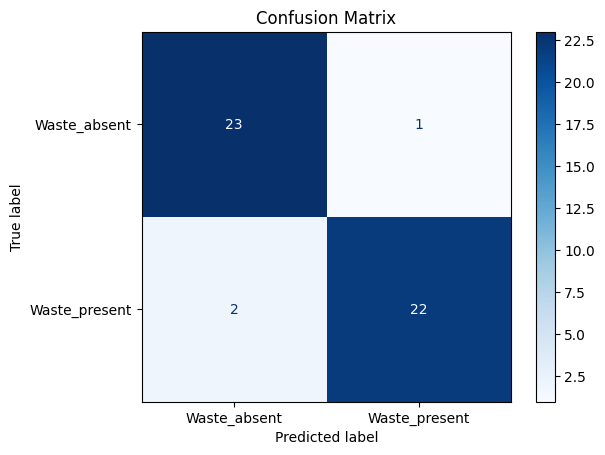

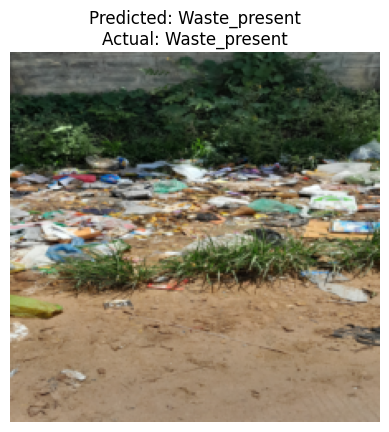

In [2]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split
from sklearn.metrics import average_precision_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np
import random
from tqdm import tqdm

# --- Simple CNN Model ---
class SimpleCNN(nn.Module):
    def __init__(self, num_classes=2):
        super(SimpleCNN, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),

            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),

            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(128 * 28 * 28, 256),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(256, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        x = self.classifier(x)
        return x

# --- Setup ---
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

dataset = datasets.ImageFolder(root="/content/drive/MyDrive/review two data", transform=transform)
class_names = dataset.classes  # ['waste_absent', 'waste_present']

# Split
total_size = len(dataset)
train_size = int(0.7 * total_size)
val_size = int(0.1 * total_size)
test_size = total_size - train_size - val_size
train_set, val_set, test_set = random_split(dataset, [train_size, val_size, test_size])
train_loader = DataLoader(train_set, batch_size=8, shuffle=True)
val_loader = DataLoader(val_set, batch_size=8, shuffle=False)
test_loader = DataLoader(test_set, batch_size=8, shuffle=False)

# Model, Loss, Optimizer
model = SimpleCNN(num_classes=2).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
num_epochs = 25

# Training Loop
for epoch in range(num_epochs):
    model.train()
    running_loss, correct, total = 0.0, 0, 0

    for images, labels in tqdm(train_loader):
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss:.4f}, Accuracy: {accuracy:.2f}%")

# Save Model
torch.save(model.state_dict(), "cnn_classifier.pth")
print("Model saved as 'cnn_classifier.pth'")

# mAP Evaluation
model.eval()
all_labels, all_probs, all_preds = [], [], []

with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        outputs = model(images)
        probs = torch.softmax(outputs, dim=1)
        _, predicted = torch.max(outputs, 1)

        all_probs.extend(probs.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())
        all_preds.extend(predicted.cpu().numpy())

all_probs = np.array(all_probs)
all_labels = np.array(all_labels)

ap_0 = average_precision_score(all_labels == 0, all_probs[:, 0])
ap_1 = average_precision_score(all_labels == 1, all_probs[:, 1])

print(f"mAP score (AP for class 'waste_absent'): {ap_0:.4f}")
print(f"mAP score (AP for class 'waste_present'): {ap_1:.4f}")

# Confusion Matrix
cm = confusion_matrix(all_labels, all_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title("Confusion Matrix")
plt.show()

# Sample Output
index = random.randint(0, len(test_set) - 1)
sample_image, sample_label = test_set[index]
image_tensor = sample_image.unsqueeze(0).to(device)

model.eval()
with torch.no_grad():
    output = model(image_tensor)
    _, pred_class = torch.max(output, 1)

img_np = sample_image.permute(1, 2, 0).cpu().numpy()
plt.imshow(img_np)
plt.title(f"Predicted: {class_names[pred_class.item()]}\nActual: {class_names[sample_label]}")
plt.axis("off")
plt.show()


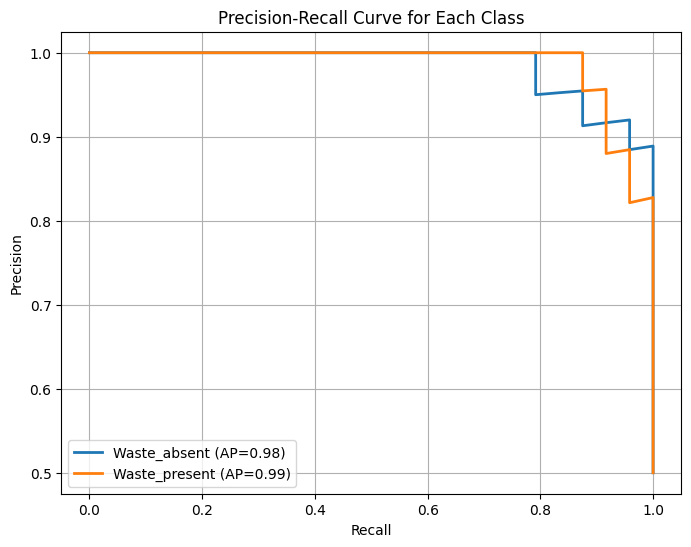

In [3]:
from sklearn.metrics import precision_recall_curve, auc

# Precision-Recall Curve
plt.figure(figsize=(8, 6))

for i, class_name in enumerate(class_names):
    binary_labels = (all_labels == i).astype(int)
    precision, recall, _ = precision_recall_curve(binary_labels, all_probs[:, i])
    pr_auc = auc(recall, precision)
    plt.plot(recall, precision, lw=2, label=f"{class_name} (AP={pr_auc:.2f})")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve for Each Class")
plt.legend()
plt.grid(True)
plt.show()


100%|██████████| 21/21 [00:12<00:00,  1.72it/s]


Epoch [1/25] Train Loss: 0.0022 | Train Acc: 100.00% | Val Loss: 0.2786 | Val Acc: 91.30%


100%|██████████| 21/21 [00:10<00:00,  1.95it/s]


Epoch [2/25] Train Loss: 0.0020 | Train Acc: 100.00% | Val Loss: 0.4968 | Val Acc: 95.65%


100%|██████████| 21/21 [00:11<00:00,  1.79it/s]


Epoch [3/25] Train Loss: 0.0003 | Train Acc: 100.00% | Val Loss: 0.4959 | Val Acc: 95.65%


100%|██████████| 21/21 [00:10<00:00,  1.91it/s]


Epoch [4/25] Train Loss: 0.0013 | Train Acc: 100.00% | Val Loss: 0.6024 | Val Acc: 82.61%


100%|██████████| 21/21 [00:10<00:00,  1.95it/s]


Epoch [5/25] Train Loss: 0.0024 | Train Acc: 100.00% | Val Loss: 0.4549 | Val Acc: 95.65%


100%|██████████| 21/21 [00:11<00:00,  1.77it/s]


Epoch [6/25] Train Loss: 0.0015 | Train Acc: 100.00% | Val Loss: 0.4945 | Val Acc: 95.65%


100%|██████████| 21/21 [00:10<00:00,  1.92it/s]


Epoch [7/25] Train Loss: 0.0004 | Train Acc: 100.00% | Val Loss: 0.5325 | Val Acc: 91.30%


100%|██████████| 21/21 [00:10<00:00,  1.93it/s]


Epoch [8/25] Train Loss: 0.0002 | Train Acc: 100.00% | Val Loss: 0.5399 | Val Acc: 91.30%


100%|██████████| 21/21 [00:10<00:00,  1.95it/s]


Epoch [9/25] Train Loss: 0.0002 | Train Acc: 100.00% | Val Loss: 0.5364 | Val Acc: 91.30%


100%|██████████| 21/21 [00:10<00:00,  1.94it/s]


Epoch [10/25] Train Loss: 0.0002 | Train Acc: 100.00% | Val Loss: 0.5336 | Val Acc: 91.30%


100%|██████████| 21/21 [00:10<00:00,  1.95it/s]


Epoch [11/25] Train Loss: 0.0002 | Train Acc: 100.00% | Val Loss: 0.5359 | Val Acc: 91.30%


100%|██████████| 21/21 [00:10<00:00,  1.94it/s]


Epoch [12/25] Train Loss: 0.0001 | Train Acc: 100.00% | Val Loss: 0.5353 | Val Acc: 91.30%


100%|██████████| 21/21 [00:10<00:00,  2.01it/s]


Epoch [13/25] Train Loss: 0.0001 | Train Acc: 100.00% | Val Loss: 0.5329 | Val Acc: 91.30%


100%|██████████| 21/21 [00:10<00:00,  2.07it/s]


Epoch [14/25] Train Loss: 0.0001 | Train Acc: 100.00% | Val Loss: 0.5362 | Val Acc: 91.30%


100%|██████████| 21/21 [00:09<00:00,  2.15it/s]


Epoch [15/25] Train Loss: 0.0001 | Train Acc: 100.00% | Val Loss: 0.5396 | Val Acc: 91.30%


100%|██████████| 21/21 [00:10<00:00,  2.07it/s]


Epoch [16/25] Train Loss: 0.0004 | Train Acc: 100.00% | Val Loss: 0.5384 | Val Acc: 91.30%


100%|██████████| 21/21 [00:10<00:00,  2.01it/s]


Epoch [17/25] Train Loss: 0.0001 | Train Acc: 100.00% | Val Loss: 0.5199 | Val Acc: 91.30%


100%|██████████| 21/21 [00:10<00:00,  1.95it/s]


Epoch [18/25] Train Loss: 0.0000 | Train Acc: 100.00% | Val Loss: 0.5208 | Val Acc: 91.30%


100%|██████████| 21/21 [00:10<00:00,  1.94it/s]


Epoch [19/25] Train Loss: 0.0000 | Train Acc: 100.00% | Val Loss: 0.5226 | Val Acc: 91.30%


100%|██████████| 21/21 [00:10<00:00,  1.94it/s]


Epoch [20/25] Train Loss: 0.0000 | Train Acc: 100.00% | Val Loss: 0.5274 | Val Acc: 91.30%


100%|██████████| 21/21 [00:10<00:00,  1.95it/s]


Epoch [21/25] Train Loss: 0.0001 | Train Acc: 100.00% | Val Loss: 0.5331 | Val Acc: 91.30%


100%|██████████| 21/21 [00:10<00:00,  1.93it/s]


Epoch [22/25] Train Loss: 0.0000 | Train Acc: 100.00% | Val Loss: 0.5415 | Val Acc: 91.30%


100%|██████████| 21/21 [00:10<00:00,  1.94it/s]


Epoch [23/25] Train Loss: 0.0001 | Train Acc: 100.00% | Val Loss: 0.5504 | Val Acc: 91.30%


100%|██████████| 21/21 [00:10<00:00,  1.96it/s]


Epoch [24/25] Train Loss: 0.0000 | Train Acc: 100.00% | Val Loss: 0.5574 | Val Acc: 91.30%


100%|██████████| 21/21 [00:11<00:00,  1.85it/s]


Epoch [25/25] Train Loss: 0.0000 | Train Acc: 100.00% | Val Loss: 0.5417 | Val Acc: 91.30%


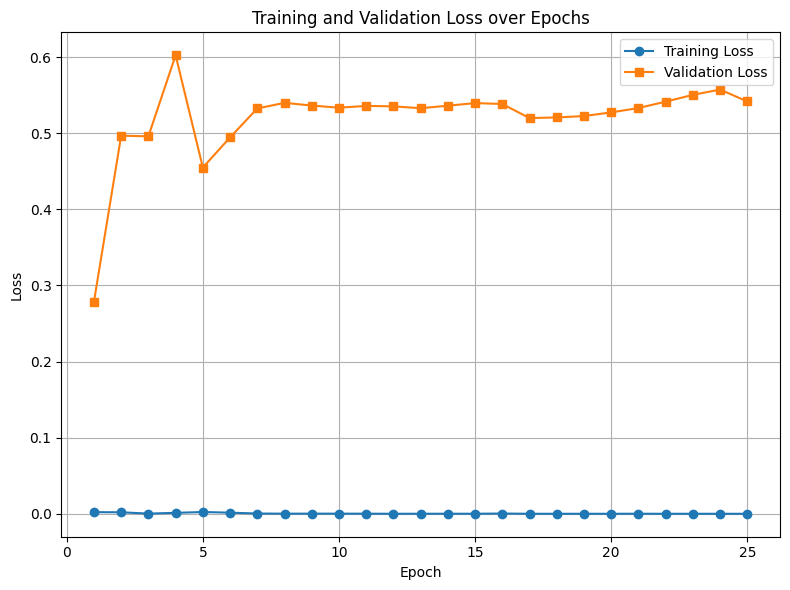

In [4]:
train_losses = []
val_losses = []

for epoch in range(num_epochs):
    model.train()
    running_loss, correct, total = 0.0, 0, 0

    for images, labels in tqdm(train_loader):
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    train_loss = running_loss / len(train_loader)
    train_losses.append(train_loss)
    train_accuracy = 100 * correct / total

    # Validation
    model.eval()
    val_loss, val_correct, val_total = 0.0, 0, 0
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            val_total += labels.size(0)
            val_correct += (predicted == labels).sum().item()

    val_loss /= len(val_loader)
    val_losses.append(val_loss)
    val_accuracy = 100 * val_correct / val_total

    print(f"Epoch [{epoch+1}/{num_epochs}] "
          f"Train Loss: {train_loss:.4f} | Train Acc: {train_accuracy:.2f}% | "
          f"Val Loss: {val_loss:.4f} | Val Acc: {val_accuracy:.2f}%")

# Plot
plt.figure(figsize=(8, 6))
plt.plot(range(1, num_epochs + 1), train_losses, label='Training Loss', marker='o')
plt.plot(range(1, num_epochs + 1), val_losses, label='Validation Loss', marker='s')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training and Validation Loss over Epochs")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
